## Calidad de los Datos

1. Limpieza de los datos del dataset Fifa21 en Python con Pandas. 

In [2]:
# Importando el modulo de pandas
from funciones_tp4 import *


# Leyendo el archivo CSV y almacenandolo en un DataFrame
df = pd.read_csv('fifa21.csv')

# Mostrando las primeras 10 filas del DataFrame
print(leer_y_mostrar_columnas(df, 10))



       ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   
5  188545     R. Lewandowski            Robert Lewandowski   
6  209331           M. Salah                 Mohamed Salah   
7  212831            Alisson         Alisson Ramses Becker   
8  231747          K. Mbappé                 Kylian Mbappé   
9  192448      M. ter Stegen         Marc-André ter Stegen   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/

a. Eliminar las columnas que no aportan datos útiles como la URL de la foto y la URL  de la fuente.

In [ ]:
# Quitando columnas innecesarias, como las URLs de las fotos, contrato y nombre largo

quitar_columnas = ['photoUrl', 'playerUrl', 'LongName', 'Contract', ]
# Mostrando las columnas restantes
df_limpio = quitar_columnas_innecesarias(df, quitar_columnas)
print(df_limpio.columns)


Index(['ID', 'Name', 'Nationality', 'Age', 'Club', 'Positions', 'Height',
       'Weight', 'Preferred Foot', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'W/F', 'SM', 'A/W', 'D/W', 'IR',
       'Hits'],
      dtype='object')


b. Dar formato a los datos de las columnas Club, Hits, Weight, Height,  Joined, Value, Release Clause y Wage. Analice cuál es el mejor formato  de datos para cada columna y aplique las transformaciones necesarias. Considere  la posibilidad de modificar el nombre de la columna

In [ ]:
# Antes de dar formato hay que saber con que tipos de datos podemos llegar a encontrarnos ya que no todos los valores puedan llegar a tener el mismo formato
# como por ejemplo en la columna de 'Wage' podemos encontrarnos con valores como '€200K' o '€1.5M' y estos no son del mismo formato


# Revisar valores únicos o representativos
columnas = ["Club", "Hits", "Weight", "Height", "Joined", "Value", "Release Clause", "Wage"]

resumen = revisar_formatos(df_limpio, columnas)
# Mostrando el resumen de valores únicos o representativos
print(resumen)


--- Club ---
contiene numeros: 652

--- Hits ---
nulos: 2595
terminados en k: 28
decimales: 27

--- Weight ---
terminados en kg: 18939
terminados en lbs: 40

--- Height ---
terminados en m: 18939

--- Joined ---

--- Value ---
terminados en m: 9300
terminados en k: 9431

--- Release Clause ---
terminados en m: 9630
terminados en k: 8088

--- Wage ---
terminados en k: 15029
{'Club': {'nulos': 0, 'espacios al comienzo': 0, 'contiene numeros': 652}, 'Hits': {'nulos': 2595, 'terminados en m': 0, 'terminados en k': 28, 'terminados en kg': 0, 'terminados en lbs': 0, 'decimales': 27}, 'Weight': {'nulos': 0, 'terminados en m': 0, 'terminados en k': 0, 'terminados en kg': 18939, 'terminados en lbs': 40, 'decimales': 0}, 'Height': {'nulos': 0, 'terminados en m': 18939, 'terminados en k': 0, 'terminados en kg': 0, 'terminados en lbs': 0, 'decimales': 0}, 'Joined': {'nulos': 0, 'terminados en m': 0, 'terminados en k': 0, 'terminados en kg': 0, 'terminados en lbs': 0, 'decimales': 0}, 'Value': {'n

### Limpieza y formateo de columnas específicas

Por defecto todas las columnas son de tipo object (string), por lo que es necesario convertirlas a su tipo correspondiente.

In [ ]:
# Club: ya que los valores de la columna contienen cadenas se optó por convertirlos a valores de tipo string
df = limpiar_columna_club(df_limpio, columna='Club')

In [ ]:
# Hits: convertir a entero (hay valores vacíos, decimales y valores con 'K')
df = limpiar_columna_hits(df_limpio, columna='Hits')

In [ ]:
# Weight: convertir de kilogramos (kg) o libras (lbs) a entero (kg)

df = limpiar_columna_weight(df_limpio, columna='Weight')

In [ ]:
# Height: convertir de centímetros (cm) o metros (m) a entero (cm)
df = limpiar_columna_height(df_limpio, columna='Height')

In [ ]:
# Joined: convertir a datetime
df = limpiar_columna_joined(df_limpio, columna='Joined')

In [ ]:
# Value, Release Clause, Wage: convertir a número (euros)

df = limpiar_columnas_dinero(df_limpio, columnas=['Value', 'Release Clause', 'Wage'])

In [ ]:
# Revisar los formatos

columnas_nuevas = ["Club", "Hits", "Weight_kg", "Height_cm", "Joined", "Value_eur", "Release Clause_eur", "Wage_eur"]
print(revisar_formatos(df_limpio, columnas_nuevas))

# Mostrar las primeras filas para verificar
#df.head()


--- Club ---
contiene numeros: 480

--- Hits ---
nulos: 2595
decimales: 16384

--- Weight_kg ---

--- Height_cm ---
decimales: 18979

--- Joined ---

--- Value_eur ---
decimales: 18979

--- Release Clause_eur ---
decimales: 18979

--- Wage_eur ---
decimales: 18979
{'Club': {'nulos': 0, 'espacios al comienzo': 0, 'contiene numeros': 480}, 'Hits': {'nulos': 2595, 'terminados en m': 0, 'terminados en k': 0, 'terminados en kg': 0, 'terminados en lbs': 0, 'decimales': 16384}, 'Weight_kg': {'nulos': 0, 'terminados en m': 0, 'terminados en k': 0, 'terminados en kg': 0, 'terminados en lbs': 0, 'decimales': 0}, 'Height_cm': {'nulos': 0, 'terminados en m': 0, 'terminados en k': 0, 'terminados en kg': 0, 'terminados en lbs': 0, 'decimales': 18979}, 'Joined': {'nulos': 0, 'terminados en m': 0, 'terminados en k': 0, 'terminados en kg': 0, 'terminados en lbs': 0, 'decimales': 0}, 'Value_eur': {'nulos': 0, 'terminados en m': 0, 'terminados en k': 0, 'terminados en kg': 0, 'terminados en lbs': 0, 'de

2. Identificar si el dataset tiene valores duplicados. ¿Es necesario eliminarlos? 

In [11]:
# Ver cuántos duplicados hay
duplicados = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")

Cantidad de filas duplicadas: 0


Utilizando la funcion de padas podemos identificar que el dataset no contiene filas duplicadas por lo tanto no es necesario eliminarlas. En caso de que se hubiesen detectado duplicados, esto no aportan nada al dataset, ya que la informacion que se muestra corresponde a un solo jugador.

4. Identificar los valores faltantes de la columna Hits y completar la columna utilizando  algunas de las técnicas mencionadas. 

In [12]:
# Primero identificamos los valores faltantes en la columna Hits
faltantes = df['Hits'].isna().sum()
print(f"Valores faltantes en Hits: {faltantes}")

# Aplicamos Imputación simple: completar con la media
media_hits = df['Hits'].mean()
df_imputacion_simple = df.copy()
df_imputacion_simple['Hits'] = df_imputacion_simple['Hits'].fillna(media_hits)

# Exportamos el DataFrame limpio a un nuevo archivo CSV
df.to_csv('fifa21_limpio.csv', index=False)

Valores faltantes en Hits: 2595


5. Basado en la columna Value, extraer en un nuevo archivo .csv una muestra con el  percentil 25% de los jugadores más valiosos de la FIFA en 2021.

In [14]:
# Seleccionar el percentil 75 (top 25%) de jugadores más valiosos
percentil_75 = df['Value_eur'].quantile(0.75)
muestra_top25 = df[df['Value_eur'] >= percentil_75]

# Guardar la muestra en un nuevo archivo CSV
muestra_top25.to_csv('fifa21_top25_valiosos.csv', index=False)

# Mostrar resultados
print(f"Muestra de jugadores en el percentil 75 (top 25%) de valor:\n{muestra_top25[['Name', 'Value_eur']].head()}")

Muestra de jugadores en el percentil 75 (top 25%) de valor:
                Name    Value_eur
0           L. Messi  103500000.0
1  Cristiano Ronaldo   63000000.0
2           J. Oblak  120000000.0
3       K. De Bruyne  129000000.0
4          Neymar Jr  132000000.0


## Preprocesamiento de datos

2. En el análisis de datos multidimensionales, resulta fundamental aplicar métodos de  reducción de dimensionalidad que permitan preservar la mayor cantidad de información  significativa posible. 

a. Lleve a cabo una investigación detallada sobre las técnicas PCA y t-SNE,  analizando sus fundamentos teóricos, las principales diferencias entre ambas y  las aplicaciones específicas de cada una. 


Resuelto en informe

b. Aplicar estas técnicas sobre un dataset a elección. 

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Cargar el dataset (limpio)
df_limpio = pd.read_csv('fifa21_limpio.csv') # Si ya lo tenés cargado, omití esta línea

# Seleccionar columnas numéricas relevantes
columnas_numericas = ['Age', 'Hits', 'Weight_kg', 'Height_cm', 'Value_eur', 'Release Clause_eur', 'Wage_eur']
df_numerico = df_limpio[columnas_numericas].dropna()

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerico)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)


c. ¿Cuántos componentes se deben usar para explicar la variabilidad del 70% y 80%  de los datos en PCA?

In [4]:
# Usá el mismo X_scaled que generaste antes
pca_full = PCA().fit(X_scaled)
varianza_acumulada = pca_full.explained_variance_ratio_.cumsum()

# Componentes para 70% y 80% de varianza
componentes_70 = (varianza_acumulada >= 0.70).argmax() + 1
componentes_80 = (varianza_acumulada >= 0.80).argmax() + 1

print(f"Componentes para explicar el 70% de la varianza: {componentes_70}")
print(f"Componentes para explicar el 80% de la varianza: {componentes_80}")

Componentes para explicar el 70% de la varianza: 3
Componentes para explicar el 80% de la varianza: 3



d. Graficar los resultados obtenidos.

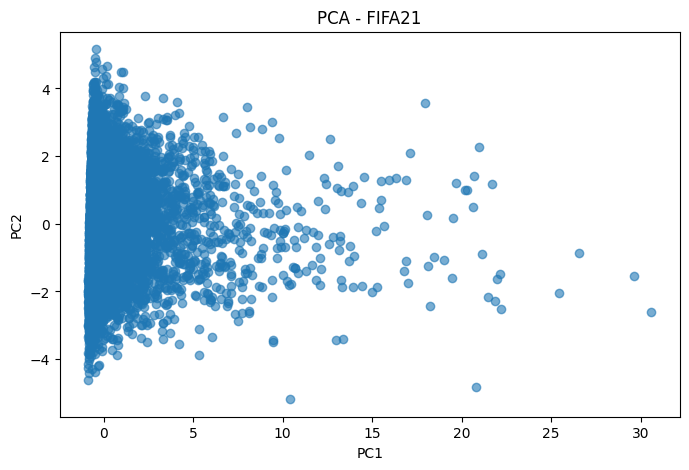

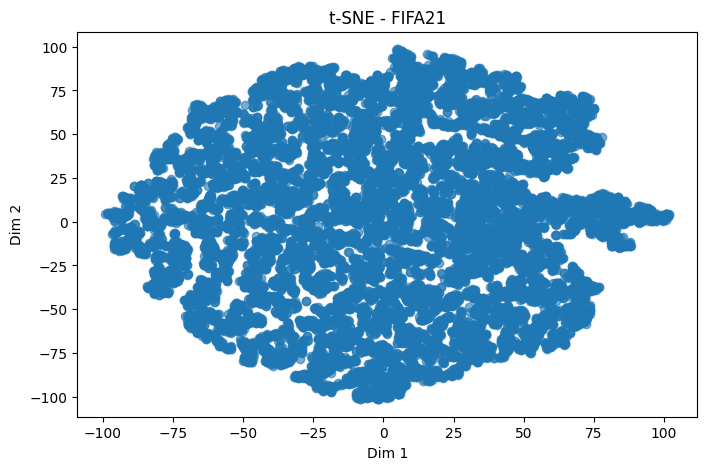

In [5]:
# Gráfico PCA
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.title('PCA - FIFA21')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Gráfico t-SNE
plt.figure(figsize=(8,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.6)
plt.title('t-SNE - FIFA21')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()


e. ¿Qué ventajas tiene aplicar la reducción de dimensionalidad sobre nuestro  dataset?

Las principales ventajas de aplicar reducción de dimensionalidad sobre el dataset son:

* Mejora el rendimiento de los algoritmos: Menos variables hacen que los modelos sean más rápidos y eficientes.
* Reduce el riesgo de sobreajuste: Elimina ruido y variables irrelevantes, ayudando a que el modelo generalice mejor.
* Facilita la visualización: Permite representar datos complejos en 2D o 3D para análisis y presentación.
* Simplifica el análisis: Hace más fácil interpretar los resultados y encontrar patrones relevantes.
* Disminuye el almacenamiento y el costo computacional: Menos datos ocupan menos espacio y requieren menos recursos para procesar.